<a href="https://colab.research.google.com/github/regapoopnut/Stuff/blob/main/Automotive_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Automotive Data Analysis Project

The project focuses on exploring the relationships between various features of major car brands and their overall CostFactor. The dataset includes key automotive attributes such as Speed, Reliability, Fuel Efficiency, Safety Rating, and Luxury Index, which are analyzed to determine how they influence or correlate with the perceived cost of a car.

 The project aims to uncover patterns and insights that highlight the trade offs and strengths across different car brands. For example, the analysis may reveal whether higher reliability tends to reduce cost, whether luxury features drive costs disproportionately, or whether performance factors such as speed and fuel efficiency play a significant role in determining the market position of a brand.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Upload CSV file from local storage
from google.colab import files
uploaded = files.upload()

Saving car_brands_dataset.csv to car_brands_dataset.csv


In [ ]:
# Loads the pandas library which is a powerful python package for data analysis and manipulation
import pandas as pd

# Shows the first 5 rows of the dataset for preview purposes
df = pd.read_csv("car_brands_dataset.csv")
print(df.head())

       Brand  Speed  Reliability  CostFactor  FuelEfficiency  SafetyRating  \
0     Toyota    180           90          70              85            88   
1      Honda    185           88          72              87            90   
2       Ford    190           75          65              75            80   
3  Chevrolet    188           70          64              70            78   
4        BMW    250           80          85              65            85   

   LuxuryIndex  
0           60  
1           62  
2           55  
3           54  
4           88  


In [ ]:
# Tells which columns are text or numbers which important for choosing the right preprocessing
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           20 non-null     object
 1   Speed           20 non-null     int64 
 2   Reliability     20 non-null     int64 
 3   CostFactor      20 non-null     int64 
 4   FuelEfficiency  20 non-null     int64 
 5   SafetyRating    20 non-null     int64 
 6   LuxuryIndex     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [ ]:
# Generates descriptive statistics for all numeric columns in the dataframe
cars.describe()

,Speed,Reliability,CostFactor,FuelEfficiency,SafetyRating,LuxuryIndex
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,231.150000,76.750000,80.300000,68.30000,83.750000,76.100000
std,50.919208,10.259142,11.792504,15.98058,6.323515,16.920557
min,180.000000,55.000000,64.000000,35.00000,68.000000,54.000000
25%,190.000000,70.000000,70.000000,61.00000,81.750000,60.000000
50%,215.000000,80.000000,80.000000,71.00000,84.500000,77.500000
75%,250.000000,84.250000,89.250000,80.50000,88.250000,90.500000
max,350.000000,90.000000,100.000000,88.00000,92.000000,100.000000


In [ ]:
# Selects CostFactor column and tells how many times each unique value appears
cars["CostFactor"].value_counts()

,count
CostFactor,
70,2
72,2
85,2
65,1
64,1
88,1
86,1
75,1
68,1


Saving figure car_attribute_histogram_plots


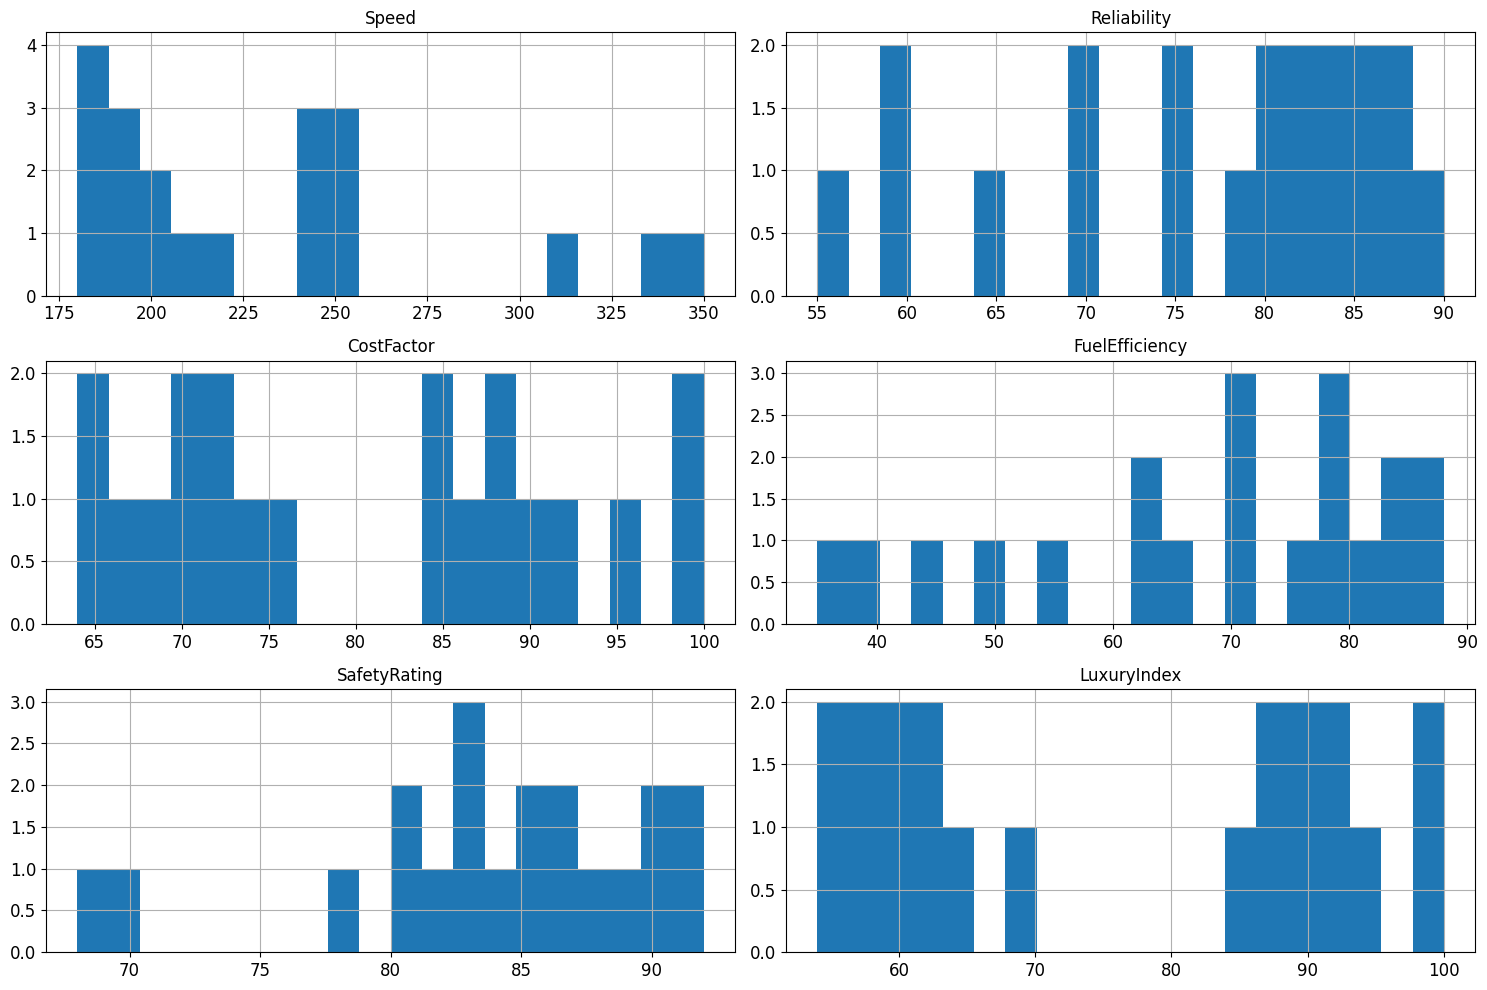

In [ ]:
# Convenience command to make sure plots show inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Creates histograms for all numeric columns in the cars dataset
cars.hist(bins=20, figsize=(15,10))

# Save the figure
save_fig("car_attribute_histogram_plots")

# Display the plots
plt.show()

## Creating a Test Set Based on CostFactor

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
# Imports the NumPy library into the python environment
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# Split the cars dataset into training and test sets
train_set, test_set = split_train_test(cars, 0.2)

# Check sizes
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 16
Test set size: 4


In [ ]:
# Takes some input and produces a 32-bit integer
from zlib import crc32

# Function to check if an ID belongs to test set
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# Function to split dataset by ID
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
# Loads Python’s hashlib library which provides secure hash functions like MD5, SHA1, SHA256
import hashlib

# Defines a function that checks if a row (given by identifier) should go into the test set
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
# Reset index to create a stable index column
cars_with_id = cars.reset_index()   # adds an 'index' column

# Perform train/test split using the index column
train_set, test_set = split_train_test_by_id(cars_with_id, 0.2, "index")

# Check sizes
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 17
Test set size: 3


In [ ]:
# Create an ID column using Brand and Speed
cars_with_id = cars.reset_index()  # keep row index as backup
cars_with_id["id"] = cars["Brand"].apply(lambda x: hash(x)) + cars["Speed"]

# Perform the split using id
train_set, test_set = split_train_test_by_id(cars_with_id, 0.2, "id")

# Check results
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))


Train set size: 16
Test set size: 4


In [ ]:
test_set.head()

,index,Brand,Speed,Reliability,CostFactor,FuelEfficiency,SafetyRating,LuxuryIndex,cost_cat,id
3,3,Chevrolet,188,70,64,70,78,54,1,-8486800233117240620
4,4,BMW,250,80,85,65,85,88,3,6300452663165343529
14,14,Ferrari,340,60,99,40,70,100,4,-7502681866605908208
19,19,Tesla,250,75,89,88,91,87,3,1319402496678829290


In [ ]:
# Brings in Scikit Learn’s built in train/test splitting function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 16
Test set size: 4


In [ ]:
test_set.head()

,Brand,Speed,Reliability,CostFactor,FuelEfficiency,SafetyRating,LuxuryIndex,cost_cat
0,Toyota,180,90,70,85,88,60,1
17,Land Rover,240,60,92,45,83,93,4
15,Lamborghini,350,55,100,35,68,100,4
1,Honda,185,88,72,87,90,62,2


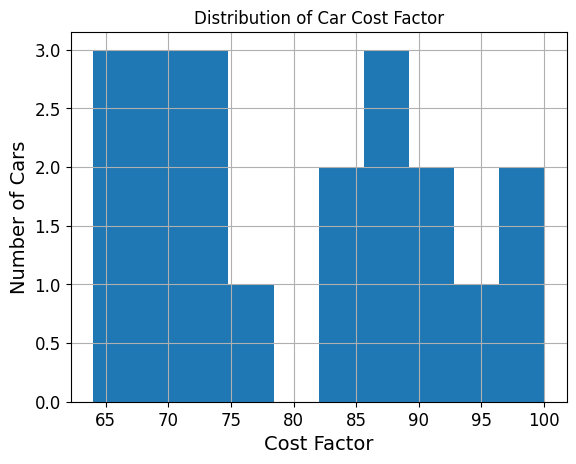

In [ ]:
import matplotlib.pyplot as plt

cars["CostFactor"].hist()
plt.title("Distribution of Car Cost Factor")
plt.xlabel("Cost Factor")
plt.ylabel("Number of Cars")
plt.show()


This chart shows you how many car brands fall into low, medium, or high cost categories. It helps visualize whether the dataset is balanced or skewed toward cheaper vs. luxury brands.

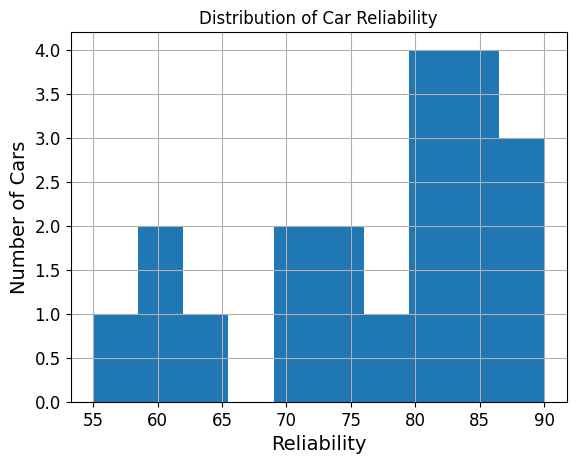

In [ ]:
import matplotlib.pyplot as plt

cars["Reliability"].hist()
plt.title("Distribution of Car Reliability")
plt.xlabel("Reliability")
plt.ylabel("Number of Cars")
plt.show()

This chart shows that most car brands in the dataset are fairly reliable, while only a handful are less reliable. So the dataset has a positive reliability bias.

# Speed Vs CostFactor Relationship

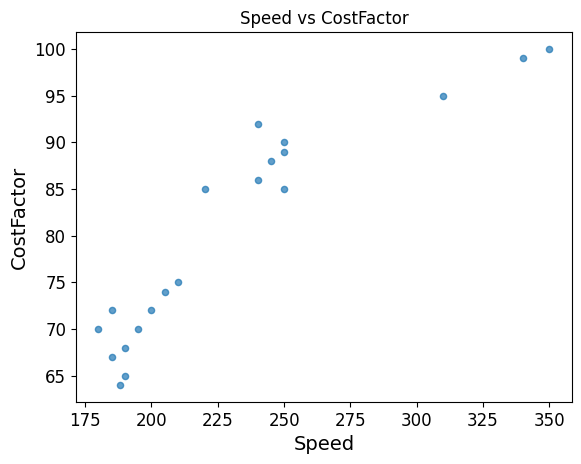

In [ ]:
cars.plot(kind="scatter", x="Speed", y="CostFactor", alpha=0.7)
plt.title("Speed vs CostFactor")
plt.xlabel("Speed")
plt.ylabel("CostFactor")
plt.show()

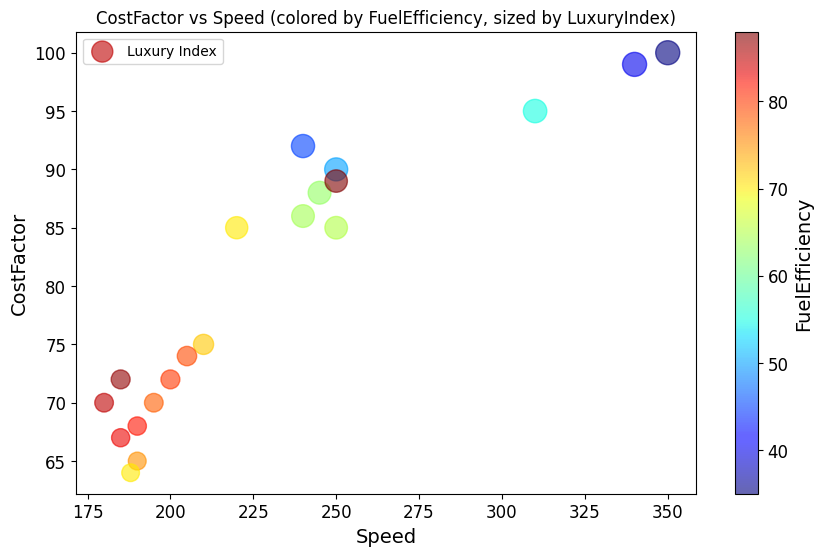

In [ ]:
cars.plot(
    kind="scatter",
    x="Speed",
    y="CostFactor",
    alpha=0.6,
    s=cars["LuxuryIndex"]*3,    # size based on luxury
    label="Luxury Index",
    figsize=(10,6),
    c="FuelEfficiency",         # color based on fuel efficiency
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.title("CostFactor vs Speed (colored by FuelEfficiency, sized by LuxuryIndex)")
plt.legend()
plt.show()

# Identifying Correlations

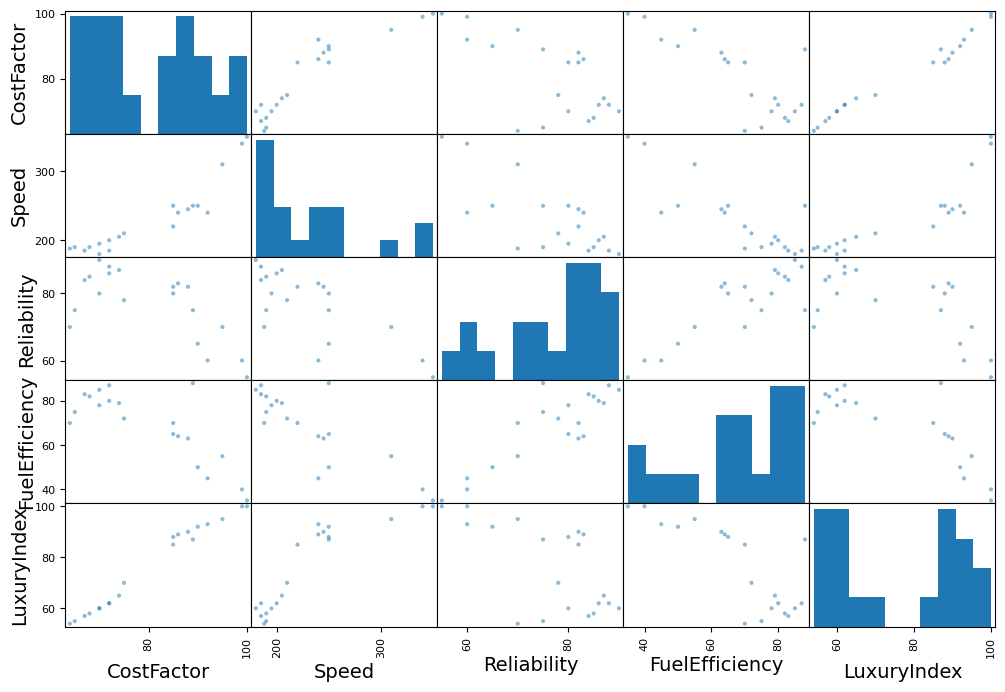

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    cars[["CostFactor", "Speed", "Reliability", "FuelEfficiency", "LuxuryIndex"]],
    figsize=(12, 8)
)
plt.show()

Diagonal histograms: These show the distribution of each individual feature.

Off-diagonal scatter plots: Each cell shows how two features relate to each other.

# The Strongest Correlation

Strongest correlation with CostFactor: LuxuryIndex


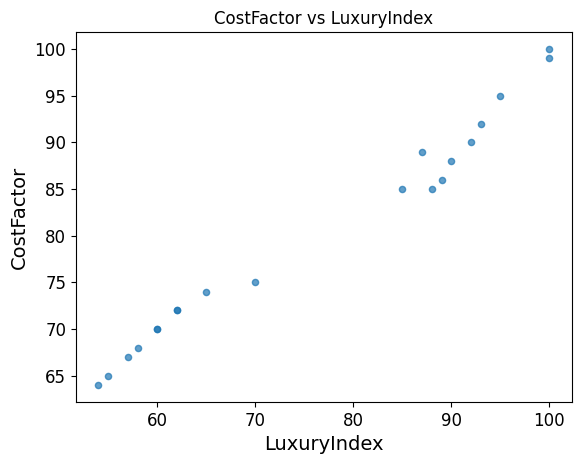

In [ ]:
# Use the correlation matrix (.corr()) which measures the strength of linear relationships between features
import matplotlib.pyplot as plt

# Drop non-numeric column and compute correlation matrix
corr_matrix = cars.drop("Brand", axis=1).corr()

# Find the feature most correlated with CostFactor (excluding CostFactor itself)
strongest_feature = corr_matrix["CostFactor"].drop("CostFactor").idxmax()
print("Strongest correlation with CostFactor:", strongest_feature)

# Scatter plot
cars.plot(kind="scatter", x=strongest_feature, y="CostFactor", alpha=0.7)
plt.title(f"CostFactor vs {strongest_feature}")
plt.show()


## Using Linear Regression to Fit Data

Mean Squared Error (MSE): 5.17970241035961
R² Score: 0.968560228161702


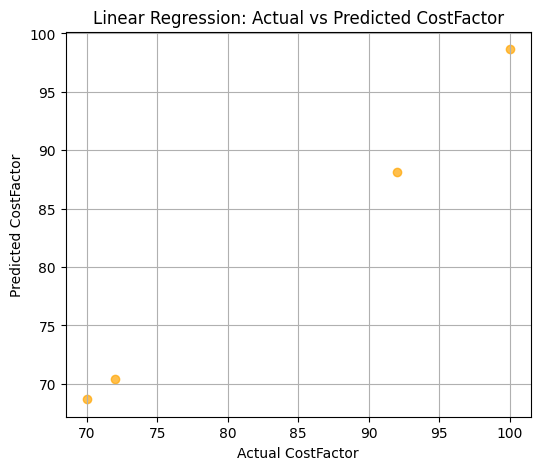

In [6]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
cars = pd.read_csv("car_brands_dataset.csv")

# Features (X) and Target (y)
X = cars[["Speed", "Reliability", "FuelEfficiency", "SafetyRating", "LuxuryIndex"]]
y = cars["CostFactor"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Actual vs Predicted Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="orange")
plt.xlabel("Actual CostFactor")
plt.ylabel("Predicted CostFactor")
plt.title("Linear Regression: Actual vs Predicted CostFactor")
plt.grid(True)
plt.show()


Linear Regression is capturing the relationship between features (Speed, Reliability, FuelEfficiency, SafetyRating, LuxuryIndex) and CostFactor. There are no extreme outliere There aren’t brands where the prediction is way off. Since the points align closely with the diagonal the model generalizes well on unseen test data.

# Fictional Cost Factor Prediction

Lets assume we have a fictional brand which scored high on reliability and speed. Based on our data and model what would be the predicted CostFactor for such a brand?

In [8]:
import numpy as np

import pandas as pd

fictional_car = pd.DataFrame([{
    "Speed": 320,
    "Reliability": 90,
    "FuelEfficiency": 70,
    "SafetyRating": 85,
    "LuxuryIndex": 80
}])

predicted_cost = lin_reg.predict(fictional_car)
print("Predicted CostFactor:", predicted_cost[0])



Predicted CostFactor: 88.51463864704974
